# Linear Kernel

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from matplotlib import style
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
style.use('ggplot')

In [2]:
data = pd.read_csv('data.csv', header=None)

X = data.values[:, :2]
y = data.values[:, 2]

In [3]:
# A function to draw hyperplane and the margin of SVM classifier
def draw_svm(X, y, C=1.0):
    # Plotting the Points
    plt.scatter(X[:,0], X[:,1], c=y)
    
    # The SVM Model with given C parameter
    clf = SVC(kernel='linear', C=C)
    clf_fit = clf.fit(X, y)
    
    # Limit of the axes
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Creating the meshgrid
    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    
    # Plotting the boundary
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
                        alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], 
                clf.support_vectors_[:, 1], 
                s=100, linewidth=1, facecolors='none')
    plt.show()
    return clf_fit

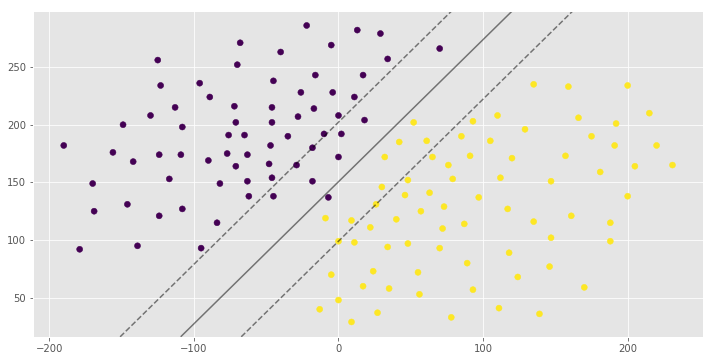

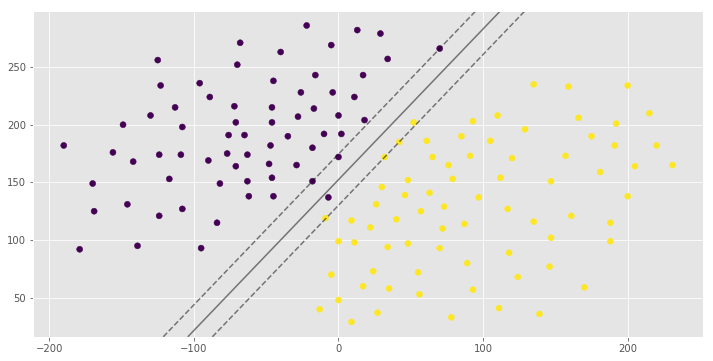

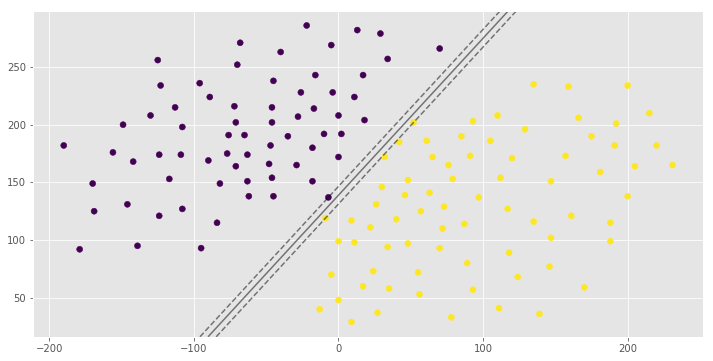

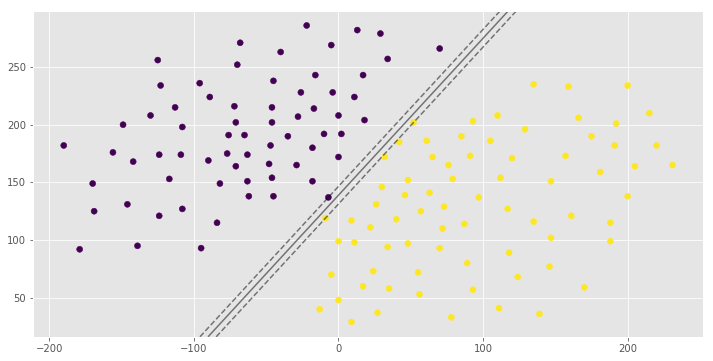

0.992907801418
[1 0 1]
0.992907801418
[1 0 1]
1.0
[1 0 1]
1.0
[1 0 1]


In [5]:
clf_arr = []
clf_arr.append(draw_svm(X, y, 0.0001))
clf_arr.append(draw_svm(X, y, 0.001))
clf_arr.append(draw_svm(X, y, 1))
clf_arr.append(draw_svm(X, y, 10))

for i, clf in enumerate(clf_arr):
    # Accuracy Score
    print(clf.score(X, y))
    pred = clf.predict([(12, 32), (-250, 32), (120, 43)])
    print(pred)